# flights data analysis using python

## by reham soliman 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "./flight_data.csv"
# file_path="./flight_data.xlsx"
# Read the CSV file into a DataFrame
# low_memory to avoid
flights = pd.read_csv(file_path)

# print columns
flights.columns 

Index(['year', 'Quarter', 'leave city code', 'arrive city code',
       'leaving city', 'leaving state', 'Capital of leaving state',
       'arriving city', 'arriving state', 'Capital of arriving state',
       'leaving airport code', 'arriving airport code', 'leaving airport ',
       'arriving airport ', 'passanger'],
      dtype='object')

# data cleaning

In [7]:
# data cleanup

# define some columns types

# Fill NaN values with the previous value in the column
flights['year'] = flights['year'].ffill()
# Convert the Year column from float to int (after filling NaN)
flights['year'] = flights['year'].astype(int)

flights['Quarter'] = flights['Quarter'].ffill()
# Convert the quarter column from float to int (after filling NaN)
flights['Quarter'] = flights['Quarter'].astype(int)

# # Fill NaN values with the mode value
# flights['miles'] = flights['miles'].fillna(flights['miles'].mode()[0])
# # Convert the miles column from object to int
# flights['miles'] = flights['miles'].astype(int)

passengers_mode = flights['passanger'].mode()[0]
# Fill NaN values with the mode value
flights['passanger'] = flights['passanger'].fillna(passengers_mode)
# Convert the passengers column from object to int
flights['passanger'] = flights['passanger'].astype(int)

# remove unwanted columns like Unnamed: 23
# flights = flights.drop(columns=['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])

# remove unwanted rows greater than index number
#flights = flights.iloc[:215765]

# # remove $ before begin
# flights['fare_Average'] = flights['fare_Average'].str.replace('$', '')
# # convert to float
# flights['fare_Average'] = flights['fare_Average'].astype(float)

# Save the cleaned DataFrame back to the CSV file

#flights.to_csv(file_path, index=False)

flights.head()

,year,Quarter,leave city code,arrive city code,leaving city,leaving state,Capital of leaving state,arriving city,arriving state,Capital of arriving state,leaving airport code,arriving airport code,leaving airport,arriving airport,passanger
0,2021,3,30194,31703,Dallas,Texas,not a capital,New York City,New York,Capital city,11259,12197,Dallas Love Field Airport,Westchester County Airport,1
1,2021,3,30423,31703,Austin,Texas,not a capital,New York City,New York,Capital city,10423,15070,Austin-Bergstrom International Airport,Stewart International Airport,1
2,2021,3,30431,31703,Asheville,North Carolina,not a capital,New York City,New York,Capital city,10431,12391,Asheville Regional Airport,Long Island MacArthur Airport,1
3,2021,3,30599,31703,Birmingham,Alabama,not a capital,New York City,New York,Capital city,10599,15070,Birmingham-Shuttlesworth International Airport,Stewart International Airport,1
4,2021,3,30615,31703,El Paso,Texas,not a capital,New York City,New York,Capital city,11540,12391,El Paso International Airport,Long Island MacArthur Airport,1


In [9]:
flights.tail(10)

,year,Quarter,leave city code,arrive city code,leaving city,leaving state,Capital of leaving state,arriving city,arriving state,Capital of arriving state,leaving airport code,arriving airport code,leaving airport,arriving airport,passanger
214993,2017,2,30194,32575,Dallas,Texas,not a capital,Los Angeles,California,Capital city,11298,14908,Dallas/Fort Worth International Airport,John Wayne Airport,841
214994,2018,2,30466,30852,Phoenix,Arizona,not a capital,Washington,District of Columbia,Capital city,14107,10821,Phoenix Sky Harbor International Airport,Baltimore/Washington International Airport,841
214995,2019,3,32457,30852,San Francisco,California,Capital city,Washington,District of Columbia,Capital city,14771,10821,San Francisco International Airport,Baltimore/Washington International Airport,841
214996,2019,4,30647,31703,Cleveland,Ohio,Capital city,New York City,New York,Capital city,11042,12953,Cleveland Hopkins International Airport,LaGuardia Airport,841
214997,2020,1,30721,31057,Boston,Massachusetts,Capital city,Charlotte,North Carolina,not a capital,10721,11057,Logan International Airport,Charlotte Douglas International Airport,841
214998,2020,1,31703,33570,New York City,New York,Capital city,San Diego,California,not a capital,12478,14679,John F. Kennedy International Airport,San Diego International Airport,841
214999,2021,2,30194,32457,Dallas,Texas,not a capital,San Francisco,California,Capital city,11298,14771,Dallas/Fort Worth International Airport,San Francisco International Airport,841
215000,2022,2,30325,32457,Denver,Colorado,not a capital,San Francisco,California,Capital city,11292,14831,Denver International Airport,San Jose International Airport,841
215001,2023,1,32337,33195,Indianapolis,Indiana,not a capital,Tampa,Florida,Capital city,12339,15304,Indianapolis International Airport,Tampa International Airport,841
215002,2023,3,32575,33192,Los Angeles,California,Capital city,Sacramento,California,not a capital,13891,14893,Ontario International Airport,Sacramento International Airport,841


## KPIs

In [11]:
# generate some kPIs from data
flights.describe()

,year,Quarter,leave city code,arrive city code,leaving airport code,arriving airport code,passanger
count,215003.000000,215003.000000,215003.000000,215003.000000,215003.000000,215003.000000,215003.000000
mean,2008.434226,2.478593,31571.345098,32203.905439,12439.891062,13241.500602,171.293066
std,8.705984,1.123139,1104.814583,1244.104519,1435.317970,1430.070153,196.290114
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,1.000000
25%,2001.000000,1.000000,30721.000000,31066.000000,11193.000000,12197.000000,21.000000
50%,2008.000000,2.000000,31423.000000,32337.000000,12266.000000,13303.000000,96.000000
75%,2016.000000,3.000000,32467.000000,33195.000000,13485.000000,14679.000000,249.000000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,841.000000


In [13]:
print("Total No. of flights : {}".format(len(flights)))

Total No. of flights : 215003


In [17]:
# sum miles
# total_miles = flights['miles'].sum()
# print("Total Miles : {} miles".format(total_miles))

In [19]:
# count unique states
unique_states = flights['leaving state'].nunique()
print("Total No. of departure states : {}".format(unique_states))

unique_states = flights['arriving state'].nunique()
print("Total No. of arrival states : {}".format(unique_states))

Total No. of departure states : 44
Total No. of arrival states : 40


In [21]:
# count unique cities
unique_cities = flights['leaving city'].nunique()
print("Total No. of departure cities : {}".format(unique_cities))

unique_cities = flights['arriving city'].nunique()
print("Total No. of arrival cities : {}".format(unique_cities))

Total No. of departure cities : 139
Total No. of arrival cities : 125


In [29]:
# count unique airports
unique_airports = flights['leaving airport '].nunique()
print("Total No. of departure airports : {}".format(unique_airports))

unique_airports = flights['arriving airport '].nunique()
print("Total No. of arrival airports : {}".format(unique_airports))

Total No. of departure airports : 176
Total No. of arrival airports : 161


In [33]:
# sum total numbers of passengers
total_passengers = flights['passanger'].sum()
print("Total No. of passengers : {} passengers".format(total_passengers))

Total No. of passengers : 36828523 passengers


In [37]:
# sum fare_Average
# total_fare_average = flights['fare_Average'].sum()
# print("Total No. of fare_average : {} fare_average in $".format(total_fare_average))

# columns details

In [39]:
print("Total No. of columns : {}".format(len(flights.columns)))

Total No. of columns : 15


In [41]:
#Names of columns
for column in flights.columns:
    print(column)

year
Quarter
leave city code
arrive city code
leaving city
leaving state
Capital of leaving state
arriving city
arriving state
Capital of arriving state
leaving airport code
arriving airport code
leaving airport 
arriving airport 
passanger


In [43]:
#Information about the columns, type and the not null values
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215003 entries, 0 to 215002
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   year                       215003 non-null  int64 
 1   Quarter                    215003 non-null  int64 
 2   leave city code            215003 non-null  int64 
 3   arrive city code           215003 non-null  int64 
 4   leaving city               215003 non-null  object
 5   leaving state              215003 non-null  object
 6   Capital of leaving state   215003 non-null  object
 7   arriving city              215003 non-null  object
 8   arriving state             215003 non-null  object
 9   Capital of arriving state  215003 non-null  object
 10  leaving airport code       215003 non-null  int64 
 11  arriving airport code      215003 non-null  int64 
 12  leaving airport            215003 non-null  object
 13  arriving airport           215003 non-null  

## charts section

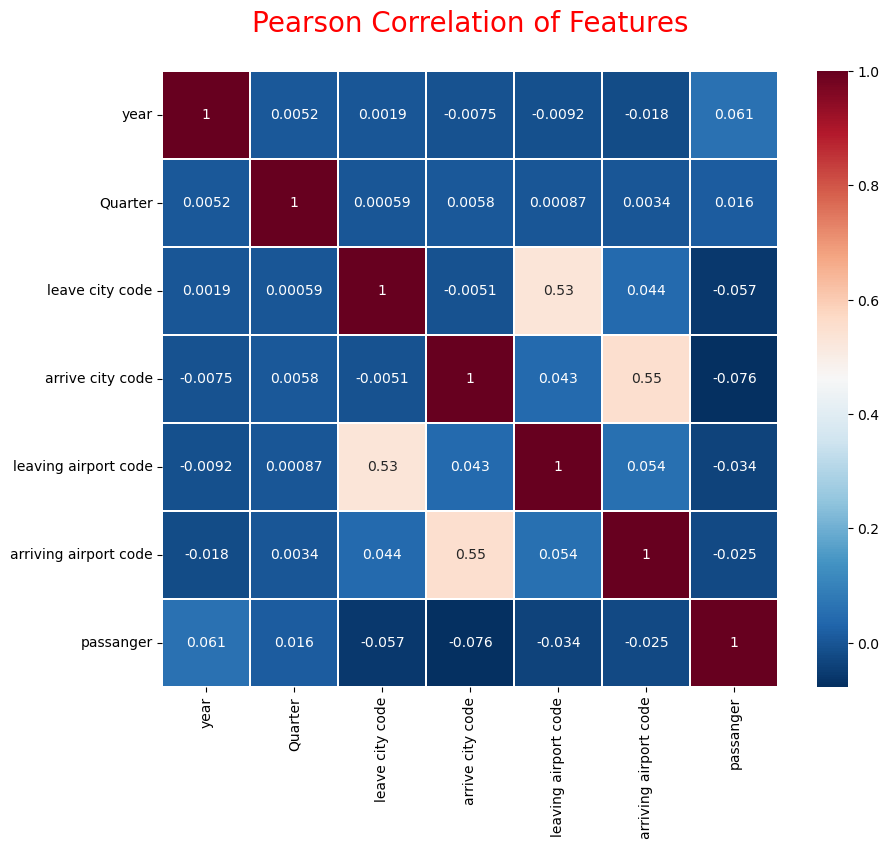

In [45]:
# Select only numeric columns for correlation calculation
numeric_flights = flights.select_dtypes(include=['number'])

# Check for missing values and drop rows with NaN if necessary
numeric_flights = numeric_flights.dropna()  # Alternatively, you can fill NaN values

# Calculate the correlation matrix
correlation_matrix = numeric_flights.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
plt.title('Pearson Correlation of Features', y=1.05, size=20, color='r')
sns.heatmap(correlation_matrix, linewidths=0.1, vmax=1.0,
            square=True, cmap=plt.cm.RdBu_r, linecolor='white', annot=True)
plt.show()

# Busiest departure airport in terms of flights count descending



In [47]:
busiest_airports = flights.groupby(['leaving airport '])['leaving airport '].count()
busiest_airports.sort_values(ascending=False)

leaving airport 
Chicago Midway International Airport        7477
T.F. Green Airport                          7333
Manchester-Boston Regional Airport          7296
Dallas/Fort Worth International Airport     6410
O'Hare International Airport                6303
                                            ... 
Whiting Field Naval Air Station                2
Scott Air Force Base                           1
Fort Worth Meacham International Airport       1
Northern Colorado Regional Airport             1
Central Illinois Regional Airport              1
Name: leaving airport , Length: 176, dtype: int64

#the top 5 busiest departure airports


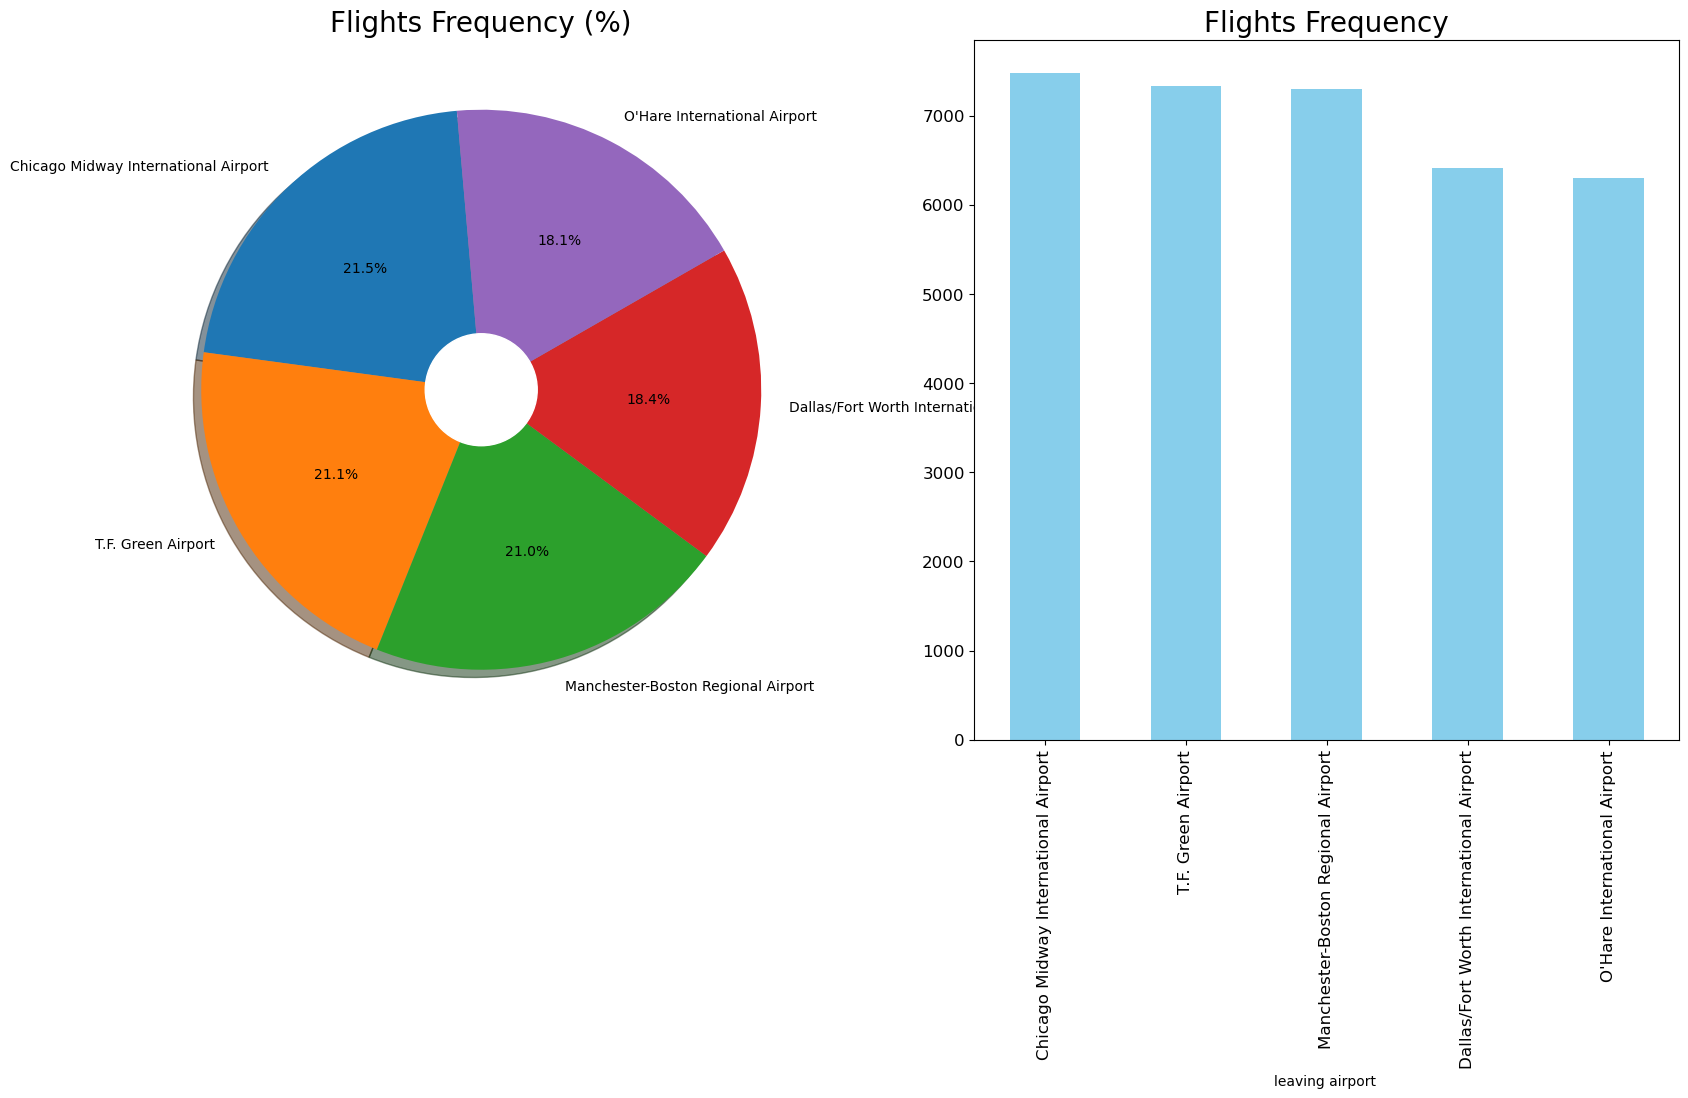

In [49]:
# Get the top 5 busiest airports 
top_airports = busiest_airports.nlargest(5)

# Creating a figure
fig = plt.figure(figsize=[20, 20])

# Pie chart for top 4 busiest airports
ax = fig.add_subplot(221)
ax.pie(top_airports, labeldistance=1.1, labels=top_airports.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights Frequency (%)", fontsize=20)
plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.2, color='white'))  # White circle in the center

# Bar chart for top 4 busiest airports
ax2 = fig.add_subplot(222)
ax2.set_title("Flights Frequency", fontsize=20)
ax2.set_facecolor('white')
top_airports.plot(kind='bar', ax=ax2, legend=False, fontsize=12, color='skyblue')
plt.show()

# Busiest Arrival airport in terms of flights count descending

In [51]:
busiest_arrival_airports = flights.groupby(['arriving airport '])['arriving airport '].count()
busiest_arrival_airports.sort_values(ascending=False)

arriving airport 
Washington Dulles International Airport       9362
Ronald Reagan Washington National Airport     9165
Baltimore/Washington International Airport    8915
Tampa International Airport                   6579
San Jose International Airport                6469
                                              ... 
Rickenbacker International Airport               2
Gulfport-Biloxi International Airport            2
Fort Wayne International Airport                 1
Orlando Sanford International Airport            1
St. Cloud Regional Airport                       1
Name: arriving airport , Length: 161, dtype: int64

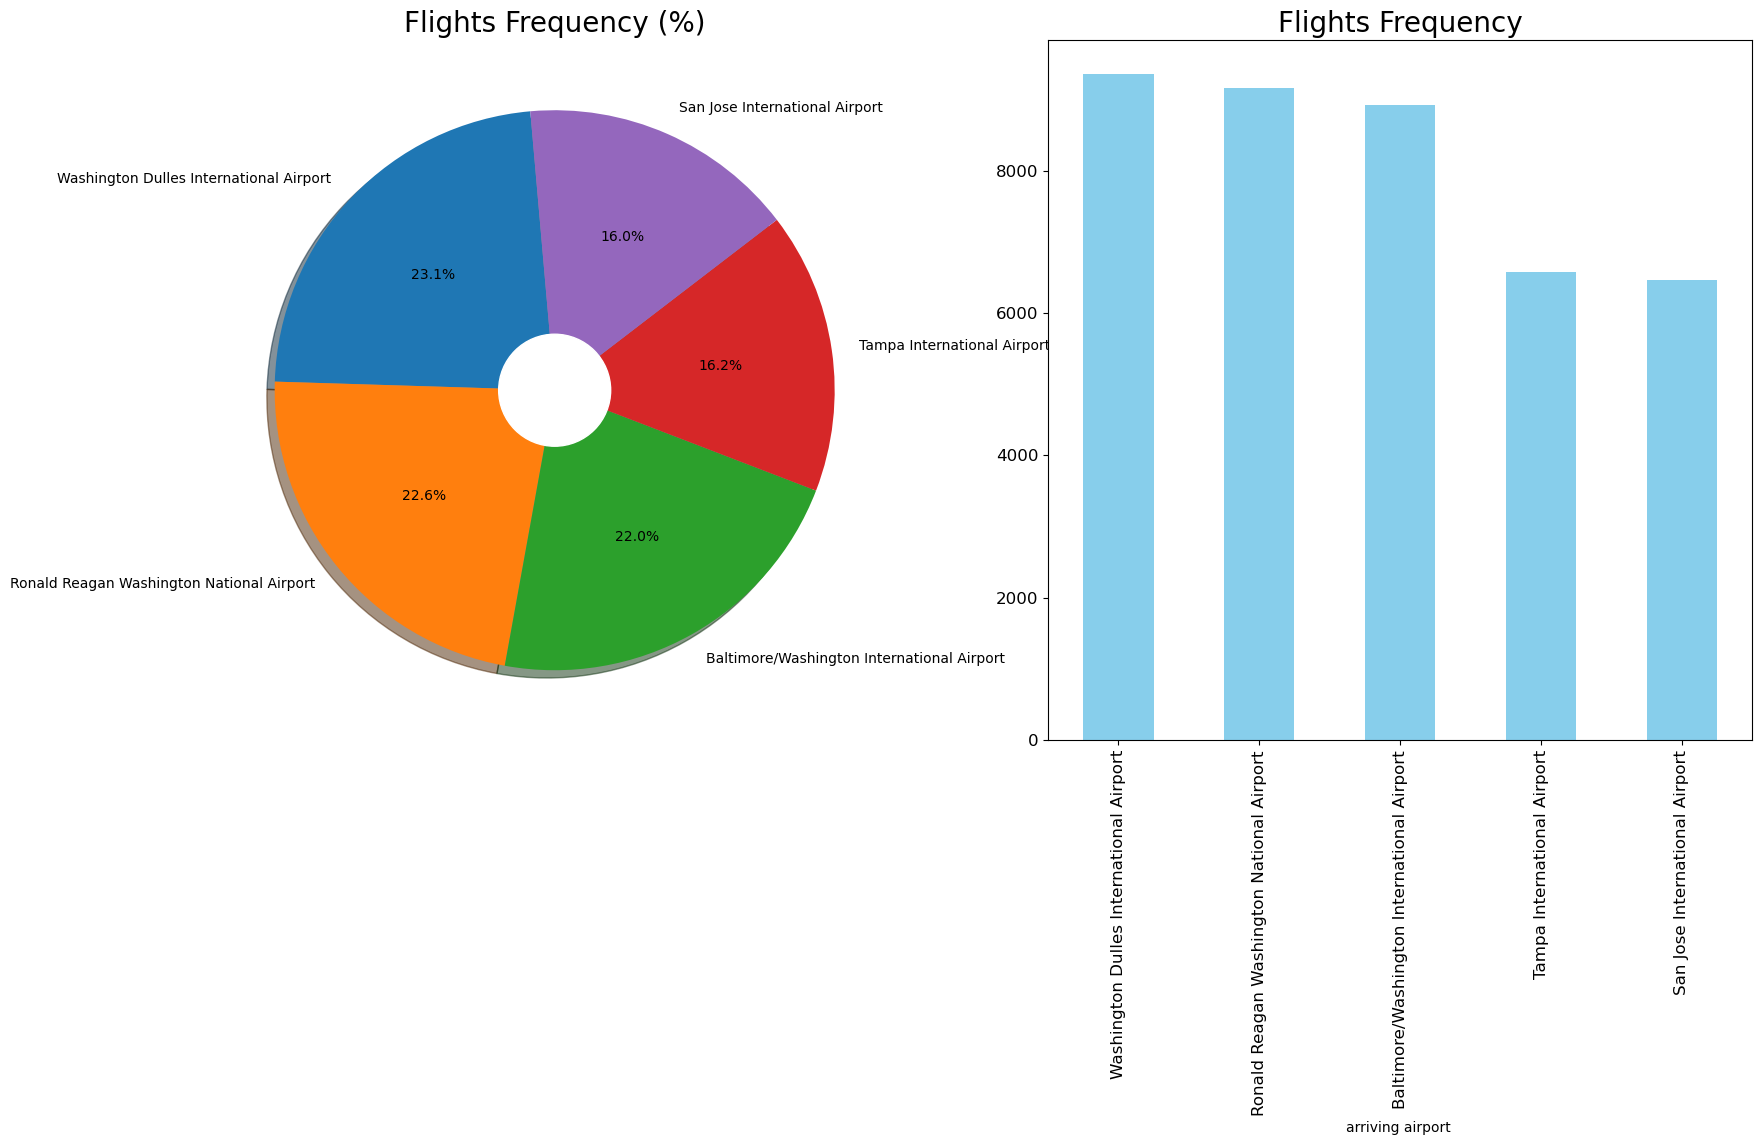

In [53]:
# Get the top 5 busiest airports
top_arrival_airports = busiest_arrival_airports.nlargest(5)

# Creating a figure
fig = plt.figure(figsize=[20, 20])

# Pie chart for top 4 busiest airports
ax = fig.add_subplot(221)
ax.pie(top_arrival_airports, labeldistance=1.1, labels=top_arrival_airports.index, startangle=95, autopct='%1.1f%%', shadow=True)
ax.set_title("Flights Frequency (%)", fontsize=20)
plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.2, color='white'))  # White circle in the center

# Bar chart for top 4 busiest airports
ax2 = fig.add_subplot(222)
ax2.set_title("Flights Frequency", fontsize=20)
ax2.set_facecolor('white')
top_arrival_airports.plot(kind='bar', ax=ax2, legend=False, fontsize=12, color='skyblue')
plt.show()

# Flights count by airlines

In [55]:
# plt.figure(figsize=(30,20))# Creating an empty plot
# ax=sns.countplot(x=flights['Airline_code'], order=flights.Airline_code.value_counts().iloc[:10].index, color='skyblue')# Countplot of airlines
# plt.tick_params(labelsize=30)# changing the label sizes
# plt.xlabel("\nAirlines" ,fontsize=50) # Adding x-label
# plt.ylabel("Count of flights" ,fontsize=50) #Adding y-label
# plt.title("\nNumber of each airlines\n",fontsize=50) # Adding plot title
# for p in ax.patches:
#     ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.05,p.get_height()+10), fontsize=30) # Adding the count above the bars
# plt.show()

# Flights frequency across years descending

In [57]:
busiest_years = flights.groupby(['year'])['year'].count()
busiest_years.sort_values(ascending=False)

year
1993    8992
1996    7909
1997    7770
1998    7642
2002    7603
1999    7602
2003    7602
2001    7499
2000    7497
2004    7487
2005    7380
2013    7285
2012    7267
2014    7208
2010    7180
2011    7153
2006    7141
2009    7140
2008    7063
2016    7037
2015    7031
2020    6976
2017    6971
2007    6947
2021    6907
2018    6891
2019    6831
2022    6623
2023    6542
1994    2224
2024    1603
Name: year, dtype: int64

# Flights frequency across years

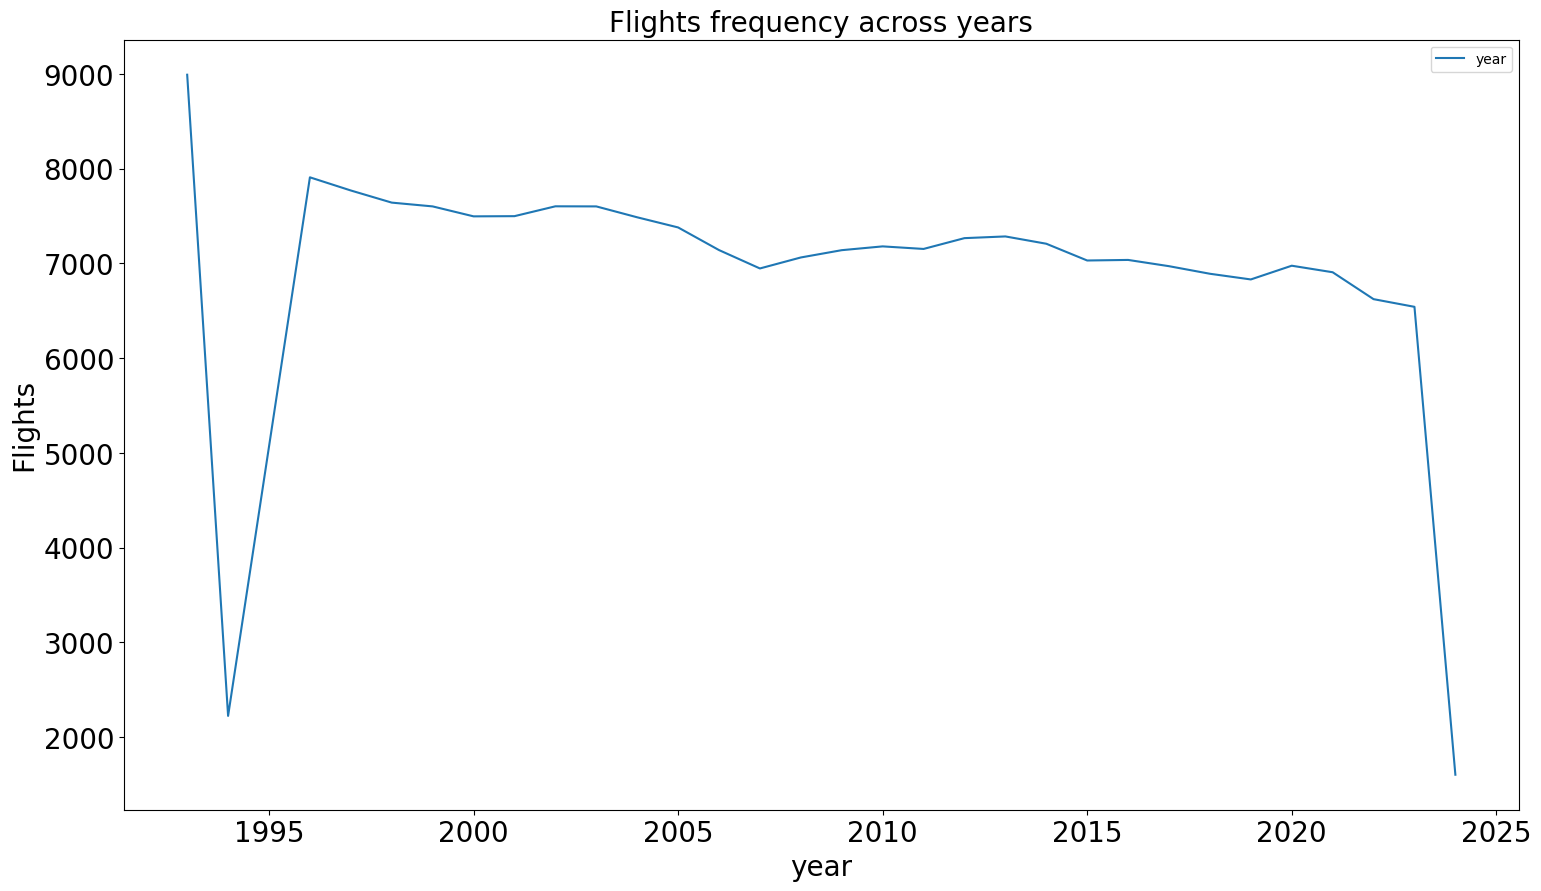

In [59]:
# pl busiest_years
fig = plt.figure(figsize=[18, 10])
ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.set_title("Flights frequency across years", fontsize=20);
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Flights", fontsize=20)
busiest_years.plot(ax=ax,  legend=True, fontsize=20)
plt.show()

# Airlines per Passengers Count

In [61]:
# airline_passengers = flights.groupby(['Airline_code'])['passengers'].sum().sort_values(ascending=False)

# # bar chart ordered by descending, top 10
# fig = plt.figure(figsize=[12, 10])
# ax = fig.add_subplot(111)
# ax.set_facecolor('white')
# ax.set_title("Airlines per Passengers Count", fontsize=20)
# ax.set_xlabel("Airline Code", fontsize=20)
# ax.set_ylabel("Passengers in M", fontsize=20)

# # Plotting the top 10 airline passengers as a bar chart
# top_10_airlines = airline_passengers.nlargest(10)
# top_10_airlines.plot.bar(ax=ax, legend=True, fontsize=20, color='skyblue')

# # Add sum number on top of each bar
# for index, value in enumerate(top_10_airlines):
#     ax.text(index, value + 0.02 * value, f'{int(value)}', ha='center', fontsize=15)

# plt.show()

# #Airlines per Miles

In [63]:
# # Assuming 'flights' is your DataFrame containing 'Airline_code' and 'miles' columns.
# # Grouping by 'Airline_code' and summing the miles
# airline_miles = flights.groupby('Airline_code')['miles'].sum().sort_values(ascending=False)

# # Prepare the top 10 airlines
# top_10_airlines = airline_miles.nlargest(10)

# # Create a bar chart
# fig, ax = plt.subplots(figsize=(12, 10))
# ax.set_facecolor('white')
# ax.set_title("Airlines per Miles Sum", fontsize=20)
# ax.set_xlabel("Airline Code", fontsize=20)
# ax.set_ylabel("Miles in M", fontsize=20)

# # Plotting the top 10 airline miles as a bar chart
# top_10_airlines.plot(kind='bar', ax=ax, legend=True, fontsize=20, color='skyblue')

# # Add sum number on top of each bar
# for index, value in enumerate(top_10_airlines):
#     ax.text(index, value + 0.02 * value, f'{int(value)}', ha='center', fontsize=15)
#     # Format y-ticks to show millions
#     ax.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks() / 1000000])

# # Show the plot
# plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# plt.show()

In [65]:
# # Assuming 'flights' is your DataFrame containing 'Airline_code' and 'fare_Average' columns.
# # Grouping by 'Airline_code' and summing the fare_Average

# airline_fare_Average = flights.groupby('Airline_code')['fare_Average'].sum().sort_values(ascending=False)

# top_10_airlines = airline_fare_Average.nlargest(10)

# # Create a bar chart
# fig, ax = plt.subplots(figsize=(12, 10))
# ax.set_facecolor('white')
# ax.set_title("Airlines per Fare Average Income", fontsize=20)
# ax.set_xlabel("Airline Code", fontsize=20)
# ax.set_ylabel("Income in M", fontsize=20)

# # Plotting the top 10 airline miles as a bar chart
# top_10_airlines.plot(kind='bar', ax=ax, legend=True, fontsize=20, color='skyblue')

# # Add sum number on top of each bar
# for index, value in enumerate(top_10_airlines):
#     ax.text(index, value + 0.02 * value, f'{int(value)}', ha='center', fontsize=15)
#     # Format y-ticks to show millions
#     ax.set_yticklabels(['{:,.0f}'.format(x) + 'M' for x in ax.get_yticks() / 1000000])

# # Show the plot
# plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# plt.show()
